# Time Resampling

In [19]:
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [4]:
# Datetime is an object. We have to change this: pd.read_csv(parse_dates=True)
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [8]:
# Daily ---> business month end frequency
df.resample(rule='BM').mean()

,Close,Volume
Date,,
2015-01-30,38.729470,1.336800e+07
2015-02-27,42.862432,7.908719e+06
2015-03-31,44.321836,8.905969e+06
2015-04-30,45.508914,8.540996e+06
2015-05-29,47.488650,6.723716e+06
2015-06-30,49.761627,6.856079e+06
2015-07-31,52.437959,8.087759e+06
2015-08-31,52.797976,1.064881e+07
2015-09-30,53.006186,8.935548e+06


In [10]:
# Daily ---> month end frequency
df.resample(rule='M').mean()

,Close,Volume
Date,,
2015-01-31,38.729470,1.336800e+07
2015-02-28,42.862432,7.908719e+06
2015-03-31,44.321836,8.905969e+06
2015-04-30,45.508914,8.540996e+06
2015-05-31,47.488650,6.723716e+06
2015-06-30,49.761627,6.856079e+06
2015-07-31,52.437959,8.087759e+06
2015-08-31,52.797976,1.064881e+07
2015-09-30,53.006186,8.935548e+06


In [11]:
# Daily ---> business month end frequency
df.resample(rule='A').max()

,Close,Volume
Date,,
2015-12-31,59.8475,38107194
2016-12-31,58.0465,32820193
2017-12-31,62.4924,53454789
2018-12-31,68.3530,62091071


In [12]:
def first_day(entry):
    # Is there an entry?
    if len(entry) != 0:
        # If so, return first entry
        return entry[0]

In [15]:
# Returna el primer valor de cada año. Puede haber malentendido con el index
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [16]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


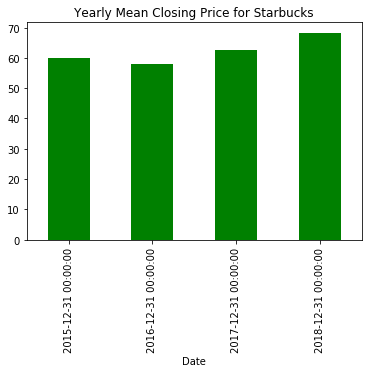

In [27]:
# Average Closing price per year
df['Close'].resample('A').max().plot.bar(title= 'Yearly Mean Closing Price for Starbucks',color='g');

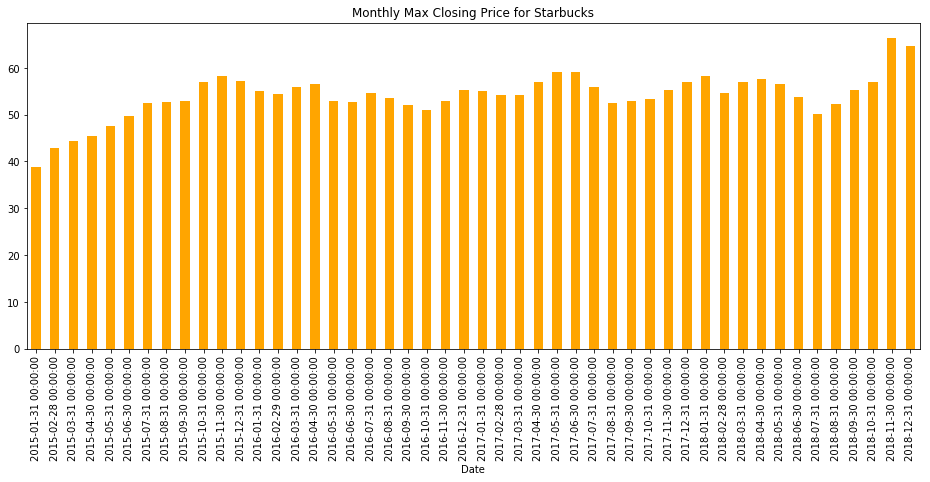

In [29]:
# Monthly Max Closing price for Starbucks
df['Close'].resample('M').mean().plot.bar(title= 'Monthly Max Closing Price for Starbucks',color='orange',figsize=(16,6));